In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras as K
import pandas as pd
import tensorflow as tf

Using TensorFlow backend.


In [2]:
import math
split_size = 400
shift_size = 50

In [3]:
# Load the csv file
entire_data = pd.read_csv('physionet2017.csv');


(8528, 2002)

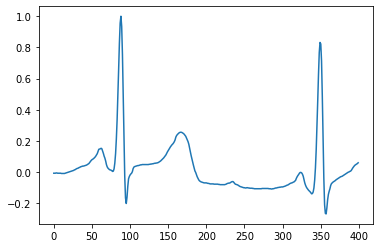

In [4]:
#Visualize some portion of the data
np_data = entire_data.to_numpy()
plt.plot(np_data[9,shift_size:split_size+shift_size])
np_data.shape

In [5]:
#Split the data into several separate sets.

#define a function for splitting the data
def split_row(data, split_length,shift_length=50):
    (row, col) = data.shape
    i = math.floor((col - (shift_length+1))/split_length)
    split_data = [];
    for x in range(i):
        start_from = (x*split_length) + shift_length
        end_at = ((x+1)*split_length) + shift_length
        split_data.append(data[:,start_from:end_at])
    return np.asarray(split_data).reshape((row*i, split_length))


(34112, 400)

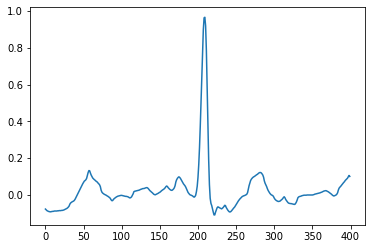

In [6]:
#Split the data
Y = split_row(np_data, split_size)

#feature scaling
# from sklearn.preprocessing import MinMaxScaler
# sc = MinMaxScaler(feature_range = (-1,1))
# Y = sc.fit_transform(split_data)

#visualize the data
plt.plot(Y[0,:])
Y.shape

In [7]:
#remove some of the outliers
Y = np.delete(Y, np.where(Y < (-0.3))[0], axis=0)
Y.shape

(15808, 400)

In [8]:
# Generate power line noise
time = np.arange(0,split_size)
pl_noise = 0.1* np.sin(50*time*np.pi/180)
pl_noise = pl_noise.reshape((1,split_size))
pl_noise.shape

(1, 400)

In [9]:
# Generate baseline wandering noise
time = np.arange(0,split_size)
bl_noise_3 = 0.3* np.cos(0.5*time*np.pi/180)
bl_noise_3= pl_noise.reshape((1,split_size))
bl_noise_3.shape

(1, 400)

In [10]:
#Generate different noise signal by different combinations of power line noise and base line noise
X_1 = (Y + pl_noise + bl_noise_3)


X_2 = (Y + pl_noise)

X_3 = (Y + bl_noise_3)

In [11]:
#Add different portions of the signal to the form 

X = []
split_portions = math.floor(X_1.shape[0]/3)
X.append(X_1[0:split_portions,:])
X.append(X_2[split_portions:(split_portions*2),:])
X.append(X_3[(split_portions*2):(split_portions*3),:])
X = np.asarray(X).reshape((split_portions*3,split_size))

X.shape

(15807, 400)

In [12]:
#remove the last dat of Y, X could not add up to the same,
Y = np.delete(Y, -1, axis=0)
Y.shape

(15807, 400)

In [13]:
#np.savetxt('Y.csv', Y, delimiter=',')
#np.savetxt('X.csv', X, delimiter=',')

In [14]:
X = np.asarray(X).astype(np.float32)
Y = np.asarray(Y).astype(np.float32)

#Split into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.05, shuffle=True)

In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Bidirectional

In [16]:
#initialising the rnn
regressor = Sequential()

In [17]:
x_shape = x_train.shape[1]

#Adding the first lstm layer
regressor.add(LSTM(units = split_size, return_sequences=True,  input_shape = (x_shape,1)))

In [18]:
#Adding the second lstm layer and some dropout regularization
regressor.add(Bidirectional(LSTM(units = split_size)))

In [19]:
#Adding the output layer
regressor.add(Dense(units=split_size))

In [20]:
#Compiling the RNN
regressor.compile(optimizer='adam', loss = 'mean_absolute_error', metrics=['accuracy'],)

In [21]:
# Reshaping
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1], 1))

In [ ]:
                    
#fitting the RNN to the Training set
regressor.fit(x_train, y_train, epochs=150, batch_size=32)

ERROR! Session/line number was not unique in database. History logging moved to new session 216


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Chikwado\Anaconda3\envs\second\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-6-097018466b5e>", line 2, in <module>
    regressor.fit(x_train, y_train, epochs=150, batch_size=32)
NameError: name 'regressor' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Chikwado\Anaconda3\envs\second\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Chikwado\Anaconda3\envs\second\lib\site-packages\IPython\core\ultratb.py", line 1169, in get_records
    return _fixed_getinnerframes(etb, number_of_lines

In [26]:
#regressor.save('pl_bl_model.h5')

In [22]:
regressor.load_weights('my_model.h5')

In [23]:
# Reshaping
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1], 1))
# Reshaping
y_train = np.reshape(y_train,(y_train.shape[0],y_train.shape[1], 1))


# Reshaping
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1], 1))
y_test = np.reshape(y_test,(y_test.shape[0],y_test.shape[1], 1))


In [24]:
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 400, 400)          643200    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 800)               2563200   
_________________________________________________________________
dense_1 (Dense)              (None, 400)               320400    
Total params: 3,526,800
Trainable params: 3,526,800
Non-trainable params: 0
_________________________________________________________________


In [ ]:
acc, b = regressor.evaluate(x_test,y_test,batch_size=32,verbose=2)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Chikwado\Anaconda3\envs\second\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-25-10a21e2da234>", line 1, in <module>
    acc, b = regressor.evaluate(x_test,y_test,batch_size=32,verbose=2)
  File "C:\Users\Chikwado\Anaconda3\envs\second\lib\site-packages\keras\engine\training.py", line 1349, in evaluate
    batch_size=batch_size)
  File "C:\Users\Chikwado\Anaconda3\envs\second\lib\site-packages\keras\engine\training.py", line 621, in _standardize_user_data
    exception_prefix='target')
  File "C:\Users\Chikwado\Anaconda3\envs\second\lib\site-packages\keras\engine\training_utils.py", line 135, in standardize_input_data
    'with shape ' + str(data_shape))
ValueError: Error when checking target: expected dense_1 to have 2 dimensions, but got array with shape (791, 400, 1)

During handling of the above exception, another exception oc

In [52]:
#Change the value of this test index in order to select a different sample for testing
test_index = 20

In [53]:
x_1 = np.reshape(x_test[test_index,:,:], (1, 400,1))
y_1 = np.reshape(y_test[test_index,:,:],(1,400,1))

y_1.shape

(1, 400, 1)

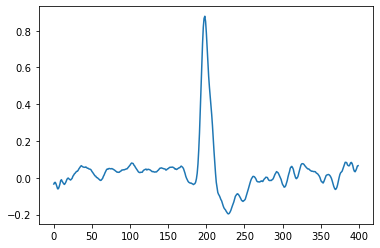

In [54]:
output_test = regressor.predict(x_1)
plt.plot(output_test[0,:])

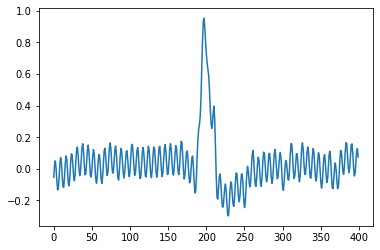

In [55]:
plt.plot(x_1[0,:])

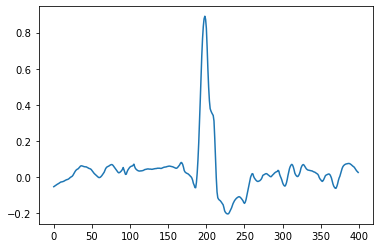

In [56]:
plt.plot(y_1[0,:])

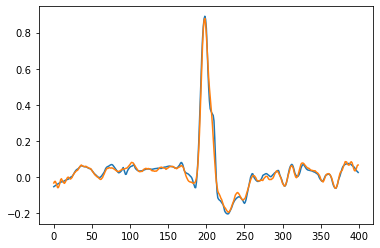

In [57]:
plt.plot(y_1[0,:])
plt.plot(output_test[0,:])

In [33]:
#Getting signal to noise ratio
def signalToNoise(cleanEcg, predicted):
    mse = np.mean((cleanEcg - predicted)**2);
    mss  = np.mean(predicted**2);
    return 10*np.log10(mss/mse)


In [34]:
signalToNoise(y_1[0,:],output_test[0,:])

-2.9277873039245605

In [59]:
for x in range(10) :
    x_1 = np.reshape(x_test[x,:,:], (1, 400,1))
    y_1 = np.reshape(y_test[x,:,:],(1,400,1))
    output_test = regressor.predict(x_1)
    np.savetxt('results/noisy'+str(x)+'.csv', x_1[0,:], delimiter=',')
    np.savetxt('results/clean'+str(x)+'.csv', y_1[0,:], delimiter=',')
    np.savetxt('results/predicted'+str(x)+'.csv', output_test[0,:], delimiter=',')